Current working directory: /Users/kudakwashechakanyuka/Downloads
Dataset Head:
                country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country   

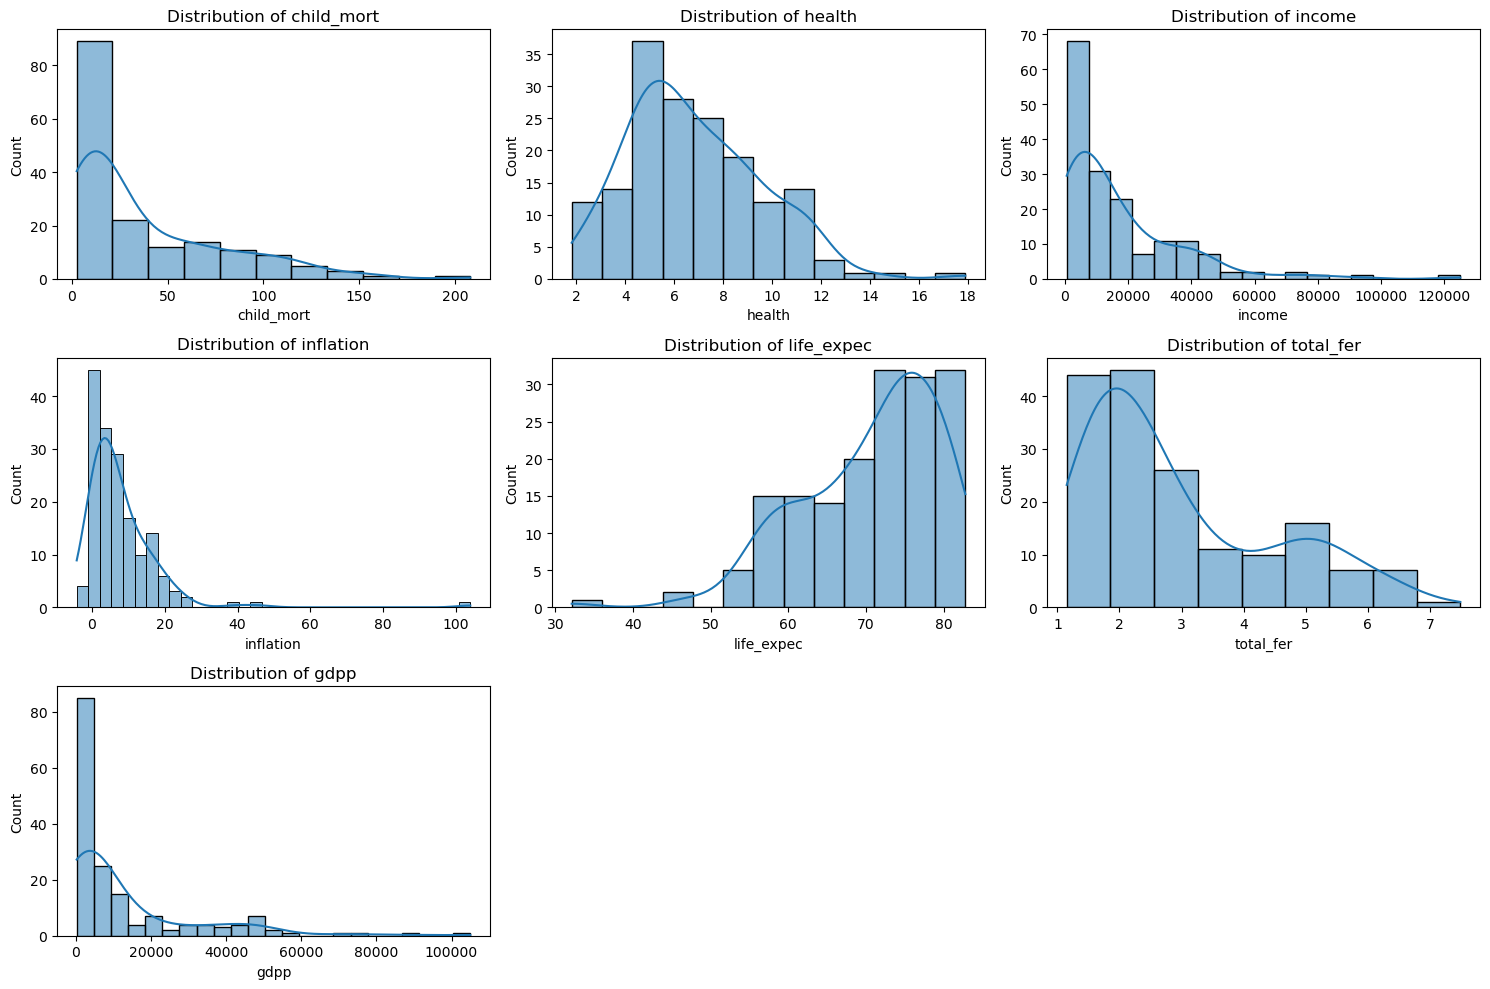


Scaled Data Description:
          child_mort        health        income     inflation    life_expec  \
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02   
mean  -3.722904e-17  5.504579e-16 -7.977650e-17 -1.063687e-17  3.696311e-16   
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00   
min   -8.871383e-01 -1.827827e+00 -8.603259e-01 -1.137852e+00 -4.337186e+00   
25%   -7.466190e-01 -6.922106e-01 -7.174558e-01 -5.666409e-01 -5.927576e-01   
50%   -4.717981e-01 -1.810007e-01 -3.738080e-01 -2.269504e-01  2.869576e-01   
75%    5.926666e-01  6.515412e-01  2.942370e-01  2.816364e-01  7.042584e-01   
max    4.221297e+00  4.047436e+00  5.611542e+00  9.129718e+00  1.380962e+00   

          total_fer          gdpp  
count  1.670000e+02  1.670000e+02  
mean   3.044803e-16  5.850277e-17  
std    1.003008e+00  1.003008e+00  
min   -1.191250e+00 -6.968005e-01  
25%   -7.639023e-01 -6.366596e-01  
50%   -3.564309e-01 -4.544309e-01  
75%    6.

In [2]:
#Question 1a
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os

def load_and_examine_data(file_path):
    df = pd.read_csv(file_path)
    print("Dataset Head:\n", df.head())
    print("\nDataset Info:")
    df.info()
    print("\nDataset Description:\n", df.describe())
    return df

def plot_histograms(df):
    features = ['child_mort', 'health', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features, 1):
        plt.subplot(3, 3, i)
        sns.histplot(df[feature], kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
    plt.tight_layout()
    save_path = 'feature_histograms.png'
    plt.savefig(save_path)
    print(f"Histograms saved to: {os.path.abspath(save_path)}")
    plt.show()

def scale_features(df):
    features = ['child_mort', 'health', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[features])
    scaled_df = pd.DataFrame(scaled_data, columns=features)
    print("\nScaled Data Description:\n", scaled_df.describe())
    return scaled_df

def main():
    file_path = '/Users/kudakwashechakanyuka/Downloads/Country-data.csv'
    print("Current working directory:", os.getcwd())
    df = load_and_examine_data(file_path)
    plot_histograms(df)
    scaled_df = scale_features(df)
    scaled_df.to_csv('scaled_country_data.csv', index=False)
    print("\nScaled data saved to 'scaled_country_data.csv'")

if __name__ == '__main__':
    main()

WCSS for each run: [463.2467955028577, 471.51316438514374, 463.840588332675, 471.78745532985306, 442.15299845633774]
Best WCSS: 442.15299845633774
Cluster assignments saved to 'cluster_assignments.csv'
Centroids saved to 'centroids.csv'


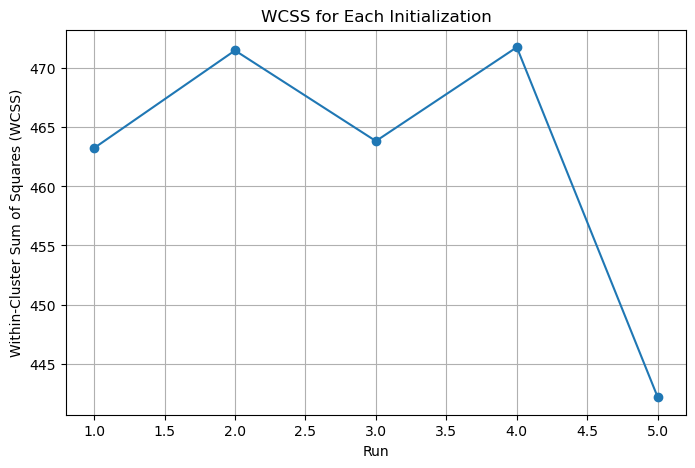

In [ ]:
#Question 1b
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_scaled_data(file_path):
    df = pd.read_csv(file_path)
    return df.values

def initialize_centroids(data, k, random_seed):
    np.random.seed(random_seed)
    indices = np.random.choice(len(data), k, replace=False)
    return data[indices]

def euclidean_distance(point, centroids):
    return np.sqrt(np.sum((point - centroids) ** 2, axis=1))

def assign_clusters(data, centroids):
    clusters = np.zeros(len(data))
    for i, point in enumerate(data):
        distances = euclidean_distance(point, centroids)
        clusters[i] = np.argmin(distances)
    return clusters

def update_centroids(data, clusters, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

def compute_wcss(data, clusters, centroids):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            wcss += np.sum((cluster_points - centroids[i]) ** 2)
    return wcss

def kmeans(data, k, random_seed, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(data, k, random_seed)
    for _ in range(max_iters):
        old_centroids = centroids.copy()
        clusters = assign_clusters(data, centroids)
        centroids = update_centroids(data, clusters, k)
        if np.max(np.sqrt(np.sum((centroids - old_centroids) ** 2, axis=1))) < tol:
            break
    wcss = compute_wcss(data, clusters, centroids)
    return clusters, centroids, wcss

def run_multiple_kmeans(data, k, n_runs):
    best_clusters = None
    best_centroids = None
    best_wcss = float('inf')
    wcss_list = []
    for i in range(n_runs):
        clusters, centroids, wcss = kmeans(data, k, random_seed=i)
        wcss_list.append(wcss)
        if wcss < best_wcss:
            best_wcss = wcss
            best_clusters = clusters
            best_centroids = centroids
    return best_clusters, best_centroids, wcss_list

def plot_wcss(wcss_list):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(wcss_list) + 1), wcss_list, marker='o')
    plt.title('WCSS for Each Initialization')
    plt.xlabel('Run')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.grid(True)
    plt.savefig('wcss_plot.png')
    plt.show()

def main():
    file_path = 'scaled_country_data.csv'
    data = load_scaled_data(file_path)
    k = 4
    n_runs = 5
    best_clusters, best_centroids, wcss_list = run_multiple_kmeans(data, k, n_runs)
    print("WCSS for each run:", wcss_list)
    print("Best WCSS:", min(wcss_list))
    output_df = pd.DataFrame({'Cluster': best_clusters.astype(int)})
    output_df.to_csv('cluster_assignments.csv', index=False)
    np.savetxt('centroids.csv', best_centroids, delimiter=',')
    print("Cluster assignments saved to 'cluster_assignments.csv'")
    print("Centroids saved to 'centroids.csv'")
    plot_wcss(wcss_list)

if __name__ == '__main__':
    main()

WCSS for each run: [463.2467955028577, 471.51316438514374, 463.840588332675, 471.78745532985306, 442.15299845633774]
Best WCSS: 442.15299845633774
Cluster assignments saved to 'cluster_assignments.csv'
Centroids saved to 'centroids.csv'


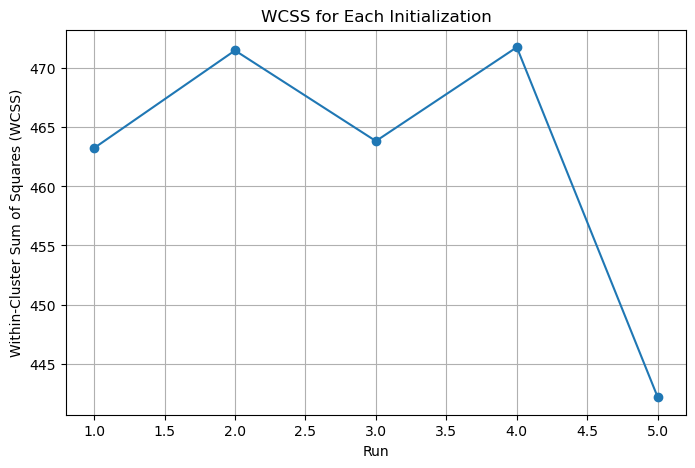

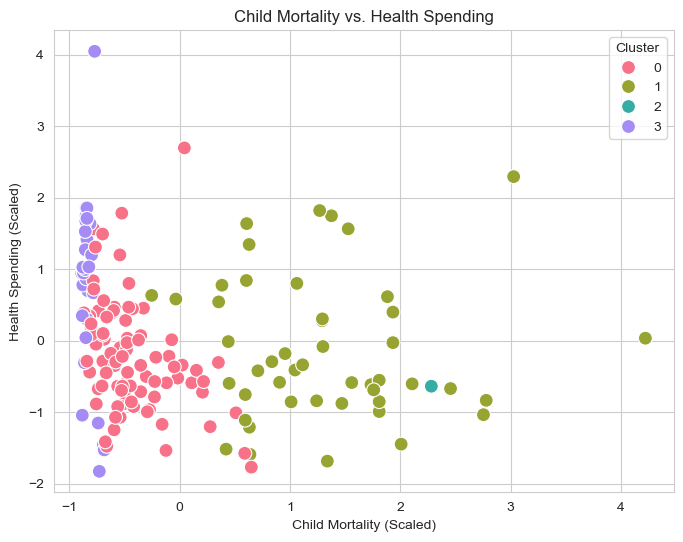

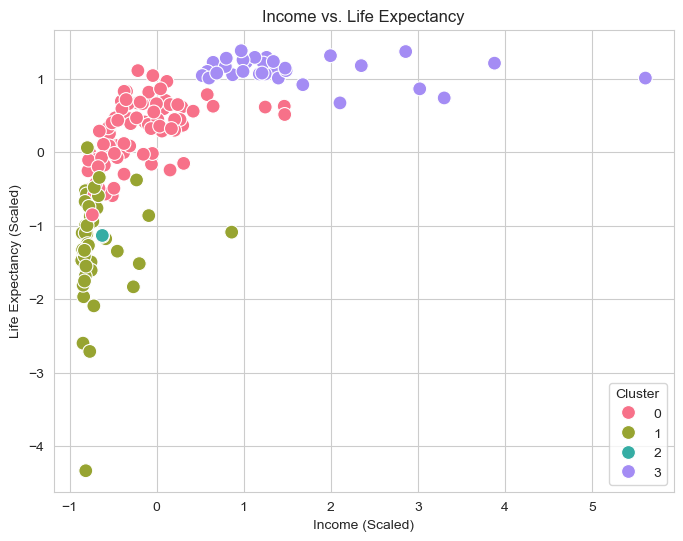

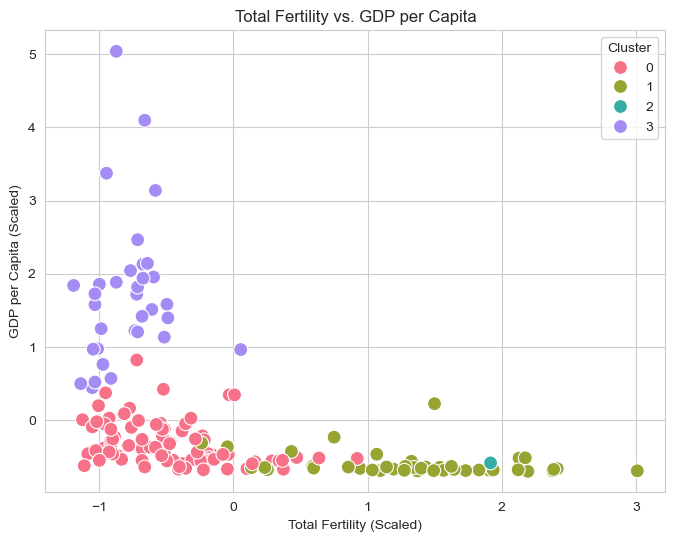

In [5]:
#Question 1c (i)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_scaled_data(file_path):
    df = pd.read_csv(file_path)
    return df.values

def initialize_centroids(data, k, random_seed):
    np.random.seed(random_seed)
    indices = np.random.choice(len(data), k, replace=False)
    return data[indices]

def euclidean_distance(point, centroids):
    return np.sqrt(np.sum((point - centroids) ** 2, axis=1))

def assign_clusters(data, centroids):
    clusters = np.zeros(len(data))
    for i, point in enumerate(data):
        distances = euclidean_distance(point, centroids)
        clusters[i] = np.argmin(distances)
    return clusters

def update_centroids(data, clusters, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

def compute_wcss(data, clusters, centroids):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            wcss += np.sum((cluster_points - centroids[i]) ** 2)
    return wcss

def kmeans(data, k, random_seed, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(data, k, random_seed)
    for _ in range(max_iters):
        old_centroids = centroids.copy()
        clusters = assign_clusters(data, centroids)
        centroids = update_centroids(data, clusters, k)
        if np.max(np.sqrt(np.sum((centroids - old_centroids) ** 2, axis=1))) < tol:
            break
    wcss = compute_wcss(data, clusters, centroids)
    return clusters, centroids, wcss

def run_multiple_kmeans(data, k, n_runs):
    best_clusters = None
    best_centroids = None
    best_wcss = float('inf')
    wcss_list = []
    for i in range(n_runs):
        clusters, centroids, wcss = kmeans(data, k, random_seed=i)
        wcss_list.append(wcss)
        if wcss < best_wcss:
            best_wcss = wcss
            best_clusters = clusters
            best_centroids = centroids
    return best_clusters, best_centroids, wcss_list

def plot_wcss(wcss_list):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(wcss_list) + 1), wcss_list, marker='o')
    plt.title('WCSS for Each Initialization')
    plt.xlabel('Run')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.grid(True)
    plt.savefig('wcss_plot.png')
    plt.show()

def plot_scatter_clusters(df, clusters):
    sns.set_style("whitegrid")
    palette = sns.color_palette("husl", 4)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['child_mort'], y=df['health'], hue=clusters, palette=palette, s=100)
    plt.title('Child Mortality vs. Health Spending')
    plt.xlabel('Child Mortality (Scaled)')
    plt.ylabel('Health Spending (Scaled)')
    plt.legend(title='Cluster')
    plt.savefig('child_mort_vs_health.png')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['income'], y=df['life_expec'], hue=clusters, palette=palette, s=100)
    plt.title('Income vs. Life Expectancy')
    plt.xlabel('Income (Scaled)')
    plt.ylabel('Life Expectancy (Scaled)')
    plt.legend(title='Cluster')
    plt.savefig('income_vs_life_expec.png')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['total_fer'], y=df['gdpp'], hue=clusters, palette=palette, s=100)
    plt.title('Total Fertility vs. GDP per Capita')
    plt.xlabel('Total Fertility (Scaled)')
    plt.ylabel('GDP per Capita (Scaled)')
    plt.legend(title='Cluster')
    plt.savefig('total_fer_vs_gdpp.png')
    plt.show()

def main():
    scaled_file = 'scaled_country_data.csv'
    clusters_file = 'cluster_assignments.csv'
    
    df_scaled = pd.read_csv(scaled_file)
    clusters = pd.read_csv(clusters_file)['Cluster'].values
    
    data = df_scaled.values
    k = 4
    n_runs = 5
    best_clusters, best_centroids, wcss_list = run_multiple_kmeans(data, k, n_runs)
    print("WCSS for each run:", wcss_list)
    print("Best WCSS:", min(wcss_list))
    output_df = pd.DataFrame({'Cluster': best_clusters.astype(int)})
    output_df.to_csv('cluster_assignments.csv', index=False)
    np.savetxt('centroids.csv', best_centroids, delimiter=',')
    print("Cluster assignments saved to 'cluster_assignments.csv'")
    print("Centroids saved to 'centroids.csv'")
    plot_wcss(wcss_list)
    
    plot_scatter_clusters(df_scaled, clusters)

if __name__ == '__main__':
    main()

WCSS for each run: [463.2467955028577, 471.51316438514374, 463.840588332675, 471.78745532985306, 442.15299845633774]
Best WCSS: 442.15299845633774
Cluster assignments saved to 'cluster_assignments.csv'
Centroids saved to 'centroids.csv'


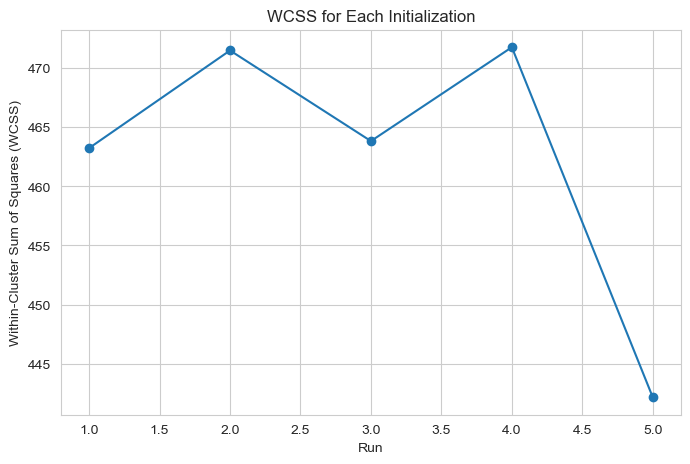

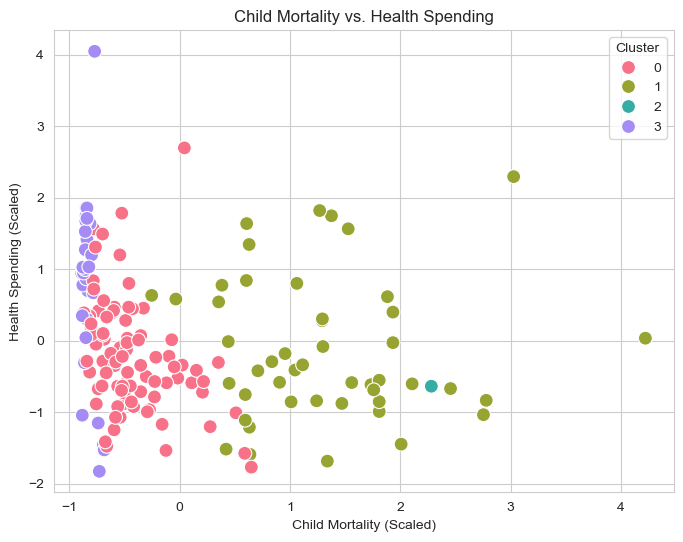

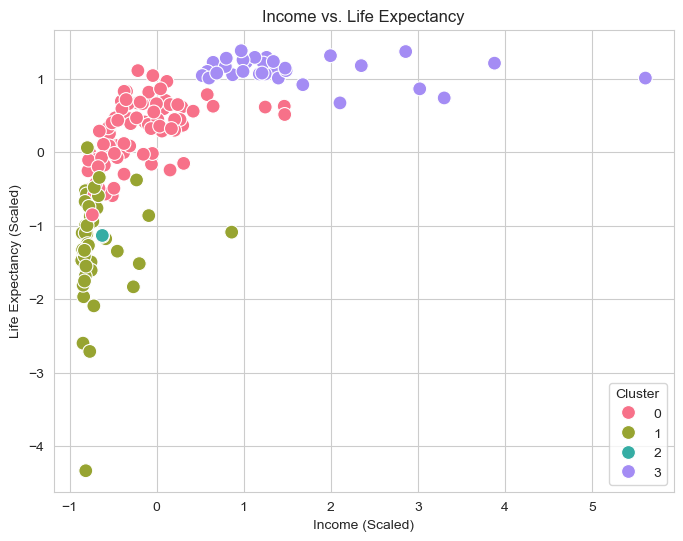

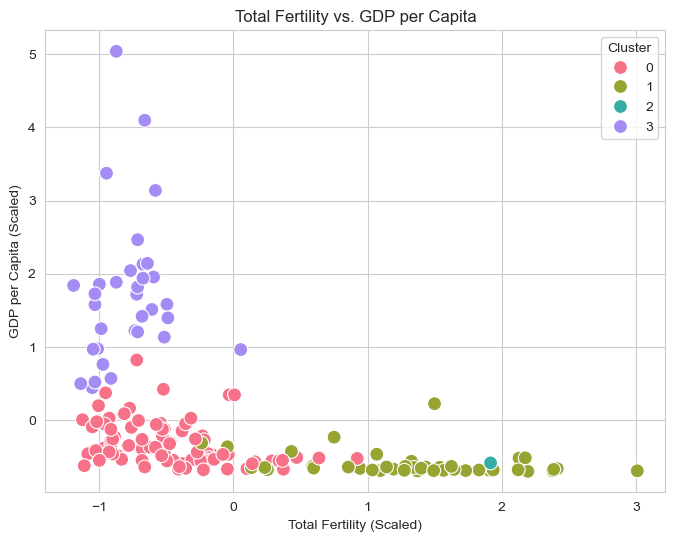


Cluster Analysis:

Cluster 0:
Number of Countries: 86
Average Values:
  child_mort: 21.31
  health: 6.21
  income: 13098.72
  inflation: 7.42
  life_expec: 73.07
  total_fer: 2.26
  gdpp: 6984.56

Cluster 1:
Number of Countries: 47
Average Values:
  child_mort: 90.79
  health: 6.46
  income: 3870.70
  inflation: 9.95
  life_expec: 59.21
  total_fer: 4.97
  gdpp: 1900.26

Cluster 2:
Number of Countries: 1
Average Values:
  child_mort: 130.00
  health: 5.07
  income: 5150.00
  inflation: 104.00
  life_expec: 60.50
  total_fer: 5.84
  gdpp: 2330.00

Cluster 3:
Number of Countries: 33
Average Values:
  child_mort: 4.88
  health: 8.95
  income: 46957.58
  inflation: 2.72
  life_expec: 80.47
  total_fer: 1.76
  gdpp: 44627.27

Cluster statistics saved to 'cluster_statistics.csv'


In [6]:
#Question 1c (ii)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_scaled_data(file_path):
    df = pd.read_csv(file_path)
    return df.values

def initialize_centroids(data, k, random_seed):
    np.random.seed(random_seed)
    indices = np.random.choice(len(data), k, replace=False)
    return data[indices]

def euclidean_distance(point, centroids):
    return np.sqrt(np.sum((point - centroids) ** 2, axis=1))

def assign_clusters(data, centroids):
    clusters = np.zeros(len(data))
    for i, point in enumerate(data):
        distances = euclidean_distance(point, centroids)
        clusters[i] = np.argmin(distances)
    return clusters

def update_centroids(data, clusters, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

def compute_wcss(data, clusters, centroids):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            wcss += np.sum((cluster_points - centroids[i]) ** 2)
    return wcss

def kmeans(data, k, random_seed, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(data, k, random_seed)
    for _ in range(max_iters):
        old_centroids = centroids.copy()
        clusters = assign_clusters(data, centroids)
        centroids = update_centroids(data, clusters, k)
        if np.max(np.sqrt(np.sum((centroids - old_centroids) ** 2, axis=1))) < tol:
            break
    wcss = compute_wcss(data, clusters, centroids)
    return clusters, centroids, wcss

def run_multiple_kmeans(data, k, n_runs):
    best_clusters = None
    best_centroids = None
    best_wcss = float('inf')
    wcss_list = []
    for i in range(n_runs):
        clusters, centroids, wcss = kmeans(data, k, random_seed=i)
        wcss_list.append(wcss)
        if wcss < best_wcss:
            best_wcss = wcss
            best_clusters = clusters
            best_centroids = centroids
    return best_clusters, best_centroids, wcss_list

def plot_wcss(wcss_list):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(wcss_list) + 1), wcss_list, marker='o')
    plt.title('WCSS for Each Initialization')
    plt.xlabel('Run')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.grid(True)
    plt.savefig('wcss_plot.png')
    plt.show()

def plot_scatter_clusters(df, clusters):
    sns.set_style("whitegrid")
    palette = sns.color_palette("husl", 4)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['child_mort'], y=df['health'], hue=clusters, palette=palette, s=100)
    plt.title('Child Mortality vs. Health Spending')
    plt.xlabel('Child Mortality (Scaled)')
    plt.ylabel('Health Spending (Scaled)')
    plt.legend(title='Cluster')
    plt.savefig('child_mort_vs_health.png')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['income'], y=df['life_expec'], hue=clusters, palette=palette, s=100)
    plt.title('Income vs. Life Expectancy')
    plt.xlabel('Income (Scaled)')
    plt.ylabel('Life Expectancy (Scaled)')
    plt.legend(title='Cluster')
    plt.savefig('income_vs_life_expec.png')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['total_fer'], y=df['gdpp'], hue=clusters, palette=palette, s=100)
    plt.title('Total Fertility vs. GDP per Capita')
    plt.xlabel('Total Fertility (Scaled)')
    plt.ylabel('GDP per Capita (Scaled)')
    plt.legend(title='Cluster')
    plt.savefig('total_fer_vs_gdpp.png')
    plt.show()

def analyze_clusters(original_file, scaled_file, clusters_file):
    df_original = pd.read_csv(original_file)
    df_scaled = pd.read_csv(scaled_file)
    clusters = pd.read_csv(clusters_file)['Cluster'].values
    
    df_original['Cluster'] = clusters
    features = ['child_mort', 'health', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
    
    print("\nCluster Analysis:")
    cluster_stats = []
    for cluster in range(4):
        cluster_data = df_original[df_original['Cluster'] == cluster]
        num_countries = len(cluster_data)
        means = cluster_data[features].mean().to_dict()
        means['Cluster'] = cluster
        means['Number of Countries'] = num_countries
        cluster_stats.append(means)
        print(f"\nCluster {cluster}:")
        print(f"Number of Countries: {num_countries}")
        print("Average Values:")
        for feature, value in means.items():
            if feature not in ['Cluster', 'Number of Countries']:
                print(f"  {feature}: {value:.2f}")
    
    stats_df = pd.DataFrame(cluster_stats)
    stats_df = stats_df[['Cluster', 'Number of Countries'] + features]
    stats_df.to_csv('cluster_statistics.csv', index=False)
    print("\nCluster statistics saved to 'cluster_statistics.csv'")

def main():
    original_file = '/Users/kudakwashechakanyuka/Downloads/Country-data.csv'
    scaled_file = 'scaled_country_data.csv'
    clusters_file = 'cluster_assignments.csv'
    
    df_scaled = pd.read_csv(scaled_file)
    clusters = pd.read_csv(clusters_file)['Cluster'].values
    
    data = df_scaled.values
    k = 4
    n_runs = 5
    best_clusters, best_centroids, wcss_list = run_multiple_kmeans(data, k, n_runs)
    print("WCSS for each run:", wcss_list)
    print("Best WCSS:", min(wcss_list))
    output_df = pd.DataFrame({'Cluster': best_clusters.astype(int)})
    output_df.to_csv('cluster_assignments.csv', index=False)
    np.savetxt('centroids.csv', best_centroids, delimiter=',')
    print("Cluster assignments saved to 'cluster_assignments.csv'")
    print("Centroids saved to 'centroids.csv'")
    plot_wcss(wcss_list)
    
    plot_scatter_clusters(df_scaled, clusters)
    analyze_clusters(original_file, scaled_file, clusters_file)

if __name__ == '__main__':
    main()

In [7]:
#Question 2
import pandas as pd
import numpy as np

def load_standardized_data(file_path):
    df = pd.read_csv(file_path)
    return df.values

def pca_from_scratch(data):
    cov_matrix = np.cov(data.T)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors, cov_matrix

def explained_variance_ratio(eigenvalues):
    total_variance = np.sum(eigenvalues)
    return eigenvalues / total_variance

def components_for_variance_ratio(explained_variance, threshold=0.8):
    cumulative_variance = np.cumsum(explained_variance)
    num_components = np.argmax(cumulative_variance >= threshold) + 1
    return num_components, cumulative_variance

def main():
    file_path = 'scaled_country_data.csv'
    data = load_standardized_data(file_path)
    eigenvalues, eigenvectors, cov_matrix = pca_from_scratch(data)
    explained_variance = explained_variance_ratio(eigenvalues)
    num_components, cumulative_variance = components_for_variance_ratio(explained_variance, threshold=0.8)
    print("Covariance Matrix:\n", cov_matrix)
    print("\nEigenvalues (sorted):\n", eigenvalues)
    print("\nEigenvectors (sorted):\n", eigenvectors)
    print("\nExplained Variance Ratio:\n", explained_variance)
    print("\nCumulative Explained Variance:\n", cumulative_variance)
    print(f"\nNumber of components to explain at least 80% of variance: {num_components}")
    pca_results = pd.DataFrame({
        'Component': range(1, len(eigenvalues) + 1),
        'Eigenvalue': eigenvalues,
        'Explained Variance Ratio': explained_variance,
        'Cumulative Variance': cumulative_variance
    })
    pca_results.to_csv('pca_results.csv', index=False)
    print("\nPCA results saved to 'pca_results.csv'")

if __name__ == '__main__':
    main()

Covariance Matrix:
 [[ 1.0060241  -0.2016093  -0.52747354  0.29001277 -0.89201752  0.85358942
  -0.485942  ]
 [-0.2016093   1.0060241   0.1303592  -0.2569142   0.21196135 -0.19785877
   0.34804965]
 [-0.52747354  0.1303592   1.0060241  -0.14864609  0.61564899 -0.50486319
   0.90096644]
 [ 0.29001277 -0.2569142  -0.14864609  1.0060241  -0.24114897  0.31883023
  -0.22296618]
 [-0.89201752  0.21196135  0.61564899 -0.24114897  1.0060241  -0.76545827
   0.60370413]
 [ 0.85358942 -0.19785877 -0.50486319  0.31883023 -0.76545827  1.0060241
  -0.45765069]
 [-0.485942    0.34804965  0.90096644 -0.22296618  0.60370413 -0.45765069
   1.0060241 ]]

Eigenvalues (sorted):
 [3.86286999 1.08494913 0.99866771 0.70733799 0.22953052 0.0901935
 0.06861985]

Eigenvectors (sorted):
 [[-0.44888664  0.08216402  0.37099265 -0.18617629 -0.18882546  0.684927
   0.33863351]
 [ 0.18170281  0.68608763  0.34930034  0.58684433 -0.03179496 -0.07662944
   0.15161748]
 [ 0.40494616 -0.27619695  0.44496665 -0.27244024 -0.

Covariance Matrix:
 [[ 1.0060241  -0.2016093  -0.52747354  0.29001277 -0.89201752  0.85358942
  -0.485942  ]
 [-0.2016093   1.0060241   0.1303592  -0.2569142   0.21196135 -0.19785877
   0.34804965]
 [-0.52747354  0.1303592   1.0060241  -0.14864609  0.61564899 -0.50486319
   0.90096644]
 [ 0.29001277 -0.2569142  -0.14864609  1.0060241  -0.24114897  0.31883023
  -0.22296618]
 [-0.89201752  0.21196135  0.61564899 -0.24114897  1.0060241  -0.76545827
   0.60370413]
 [ 0.85358942 -0.19785877 -0.50486319  0.31883023 -0.76545827  1.0060241
  -0.45765069]
 [-0.485942    0.34804965  0.90096644 -0.22296618  0.60370413 -0.45765069
   1.0060241 ]]

Eigenvalues (sorted):
 [3.86286999 1.08494913 0.99866771 0.70733799 0.22953052 0.0901935
 0.06861985]

Eigenvectors (sorted):
 [[-0.44888664  0.08216402  0.37099265 -0.18617629 -0.18882546  0.684927
   0.33863351]
 [ 0.18170281  0.68608763  0.34930034  0.58684433 -0.03179496 -0.07662944
   0.15161748]
 [ 0.40494616 -0.27619695  0.44496665 -0.27244024 -0.

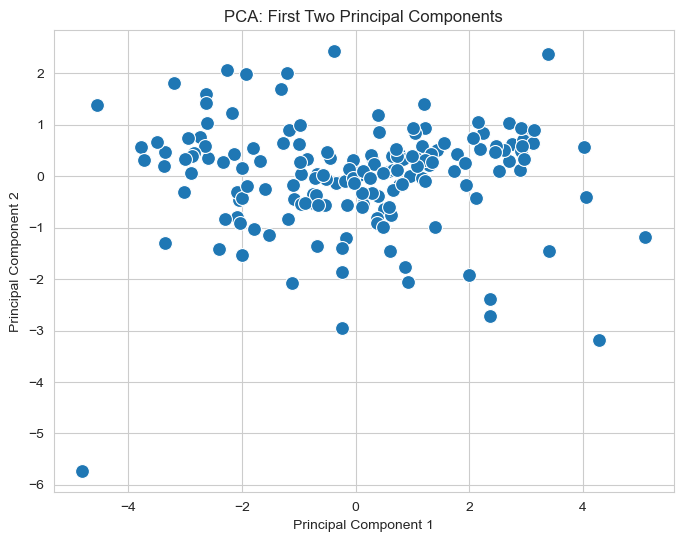


WCSS for each run: [231.44465293569817, 225.18542970346834, 236.06743578787285, 242.1371749244134, 224.22011327159262]
Best WCSS: 224.22011327159262


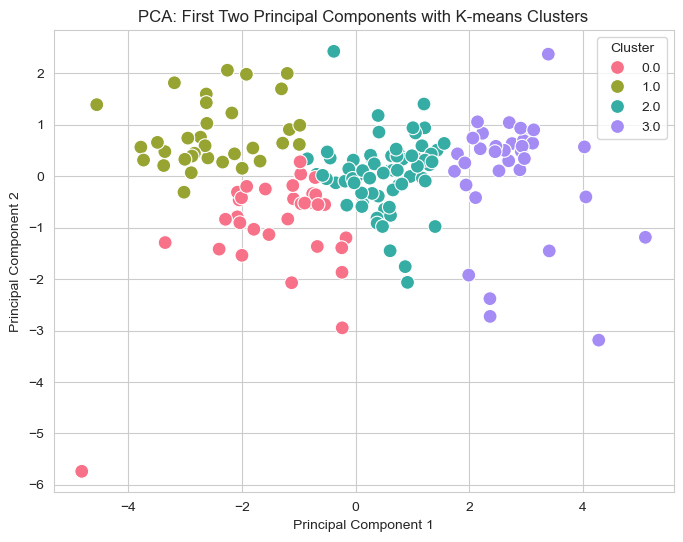

2D reduced data with cluster assignments saved to 'pca_reduced_data.csv'


In [8]:
#Question 2b
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_standardized_data(file_path):
    df = pd.read_csv(file_path)
    return df.values

def pca_from_scratch(data):
    cov_matrix = np.cov(data.T)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors, cov_matrix

def explained_variance_ratio(eigenvalues):
    total_variance = np.sum(eigenvalues)
    return eigenvalues / total_variance

def components_for_variance_ratio(explained_variance, threshold=0.8):
    cumulative_variance = np.cumsum(explained_variance)
    num_components = np.argmax(cumulative_variance >= threshold) + 1
    return num_components, cumulative_variance

def project_data(data, eigenvectors, num_components=2):
    top_eigenvectors = eigenvectors[:, :num_components]
    projected_data = np.dot(data, top_eigenvectors)
    return projected_data

def initialize_centroids(data, k, random_seed):
    np.random.seed(random_seed)
    indices = np.random.choice(len(data), k, replace=False)
    return data[indices]

def euclidean_distance(point, centroids):
    return np.sqrt(np.sum((point - centroids) ** 2, axis=1))

def assign_clusters(data, centroids):
    clusters = np.zeros(len(data))
    for i, point in enumerate(data):
        distances = euclidean_distance(point, centroids)
        clusters[i] = np.argmin(distances)
    return clusters

def update_centroids(data, clusters, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

def compute_wcss(data, clusters, centroids):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            wcss += np.sum((cluster_points - centroids[i]) ** 2)
    return wcss

def kmeans(data, k, random_seed, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(data, k, random_seed)
    for _ in range(max_iters):
        old_centroids = centroids.copy()
        clusters = assign_clusters(data, centroids)
        centroids = update_centroids(data, clusters, k)
        if np.max(np.sqrt(np.sum((centroids - old_centroids) ** 2, axis=1))) < tol:
            break
    wcss = compute_wcss(data, clusters, centroids)
    return clusters, centroids, wcss

def run_multiple_kmeans(data, k, n_runs):
    best_clusters = None
    best_centroids = None
    best_wcss = float('inf')
    wcss_list = []
    for i in range(n_runs):
        clusters, centroids, wcss = kmeans(data, k, random_seed=i)
        wcss_list.append(wcss)
        if wcss < best_wcss:
            best_wcss = wcss
            best_clusters = clusters
            best_centroids = centroids
    return best_clusters, best_centroids, wcss_list

def plot_pca_scatter(projected_data, clusters=None, filename_prefix='pca'):
    sns.set_style("whitegrid")
    if clusters is None:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=projected_data[:, 0], y=projected_data[:, 1], s=100)
        plt.title('PCA: First Two Principal Components')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.savefig(f'{filename_prefix}_scatter.png')
        plt.show()
    else:
        palette = sns.color_palette("husl", 4)
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=projected_data[:, 0], y=projected_data[:, 1], hue=clusters, palette=palette, s=100)
        plt.title('PCA: First Two Principal Components with K-means Clusters')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend(title='Cluster')
        plt.savefig(f'{filename_prefix}_clustered.png')
        plt.show()

def main():
    file_path = 'scaled_country_data.csv'
    data = load_standardized_data(file_path)
    
    eigenvalues, eigenvectors, cov_matrix = pca_from_scratch(data)
    explained_variance = explained_variance_ratio(eigenvalues)
    num_components, cumulative_variance = components_for_variance_ratio(explained_variance, threshold=0.8)
    
    print("Covariance Matrix:\n", cov_matrix)
    print("\nEigenvalues (sorted):\n", eigenvalues)
    print("\nEigenvectors (sorted):\n", eigenvectors)
    print("\nExplained Variance Ratio:\n", explained_variance)
    print("\nCumulative Explained Variance:\n", cumulative_variance)
    print(f"\nNumber of components to explain at least 80% of variance: {num_components}")
    
    pca_results = pd.DataFrame({
        'Component': range(1, len(eigenvalues) + 1),
        'Eigenvalue': eigenvalues,
        'Explained Variance Ratio': explained_variance,
        'Cumulative Variance': cumulative_variance
    })
    pca_results.to_csv('pca_results.csv', index=False)
    print("\nPCA results saved to 'pca_results.csv'")
    
    projected_data = project_data(data, eigenvectors, num_components=2)
    plot_pca_scatter(projected_data, filename_prefix='pca')
    
    k = 4
    n_runs = 5
    best_clusters, best_centroids, wcss_list = run_multiple_kmeans(projected_data, k, n_runs)
    print("\nWCSS for each run:", wcss_list)
    print("Best WCSS:", min(wcss_list))
    
    plot_pca_scatter(projected_data, best_clusters, filename_prefix='pca_clustered')
    
    reduced_data_df = pd.DataFrame(projected_data, columns=['PC1', 'PC2'])
    reduced_data_df['Cluster'] = best_clusters.astype(int)
    reduced_data_df.to_csv('pca_reduced_data.csv', index=False)
    print("2D reduced data with cluster assignments saved to 'pca_reduced_data.csv'")

if __name__ == '__main__':
    main()

Covariance Matrix:
 [[ 1.0060241  -0.2016093  -0.52747354  0.29001277 -0.89201752  0.85358942
  -0.485942  ]
 [-0.2016093   1.0060241   0.1303592  -0.2569142   0.21196135 -0.19785877
   0.34804965]
 [-0.52747354  0.1303592   1.0060241  -0.14864609  0.61564899 -0.50486319
   0.90096644]
 [ 0.29001277 -0.2569142  -0.14864609  1.0060241  -0.24114897  0.31883023
  -0.22296618]
 [-0.89201752  0.21196135  0.61564899 -0.24114897  1.0060241  -0.76545827
   0.60370413]
 [ 0.85358942 -0.19785877 -0.50486319  0.31883023 -0.76545827  1.0060241
  -0.45765069]
 [-0.485942    0.34804965  0.90096644 -0.22296618  0.60370413 -0.45765069
   1.0060241 ]]

Eigenvalues (sorted):
 [3.86286999 1.08494913 0.99866771 0.70733799 0.22953052 0.0901935
 0.06861985]

Eigenvectors (sorted):
 [[-0.44888664  0.08216402  0.37099265 -0.18617629 -0.18882546  0.684927
   0.33863351]
 [ 0.18170281  0.68608763  0.34930034  0.58684433 -0.03179496 -0.07662944
   0.15161748]
 [ 0.40494616 -0.27619695  0.44496665 -0.27244024 -0.

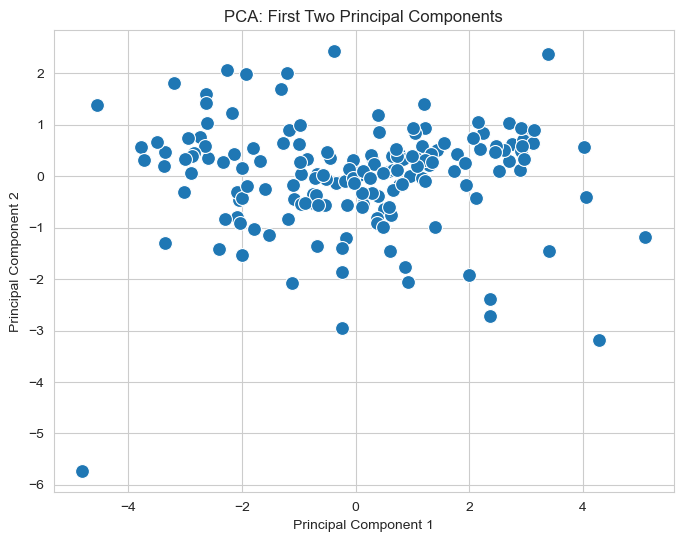


2D PCA - WCSS for each run: [231.44465293569817, 225.18542970346834, 236.06743578787285, 242.1371749244134, 224.22011327159262]
2D PCA - Best WCSS: 224.22011327159262


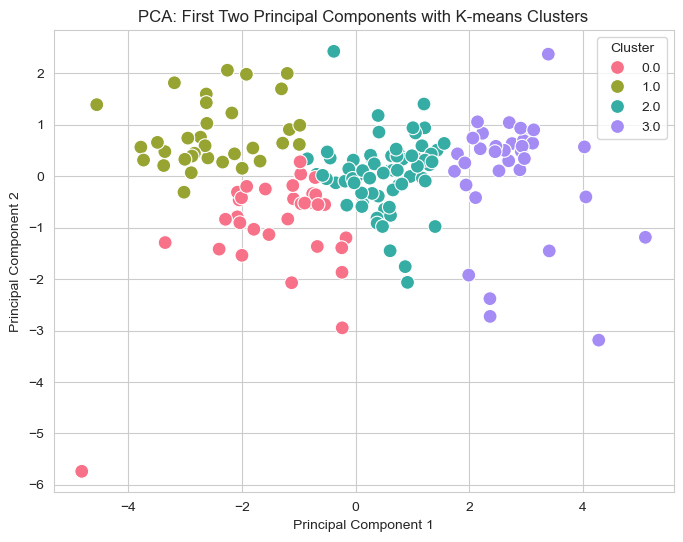

2D reduced data with cluster assignments saved to 'pca_reduced_data.csv'


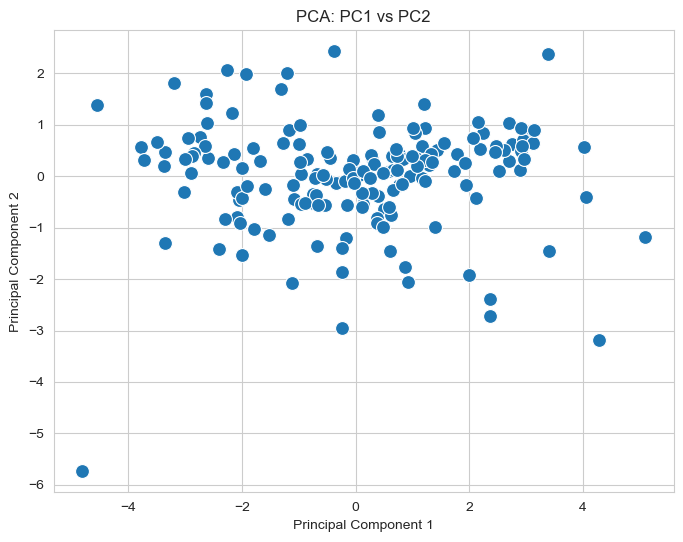

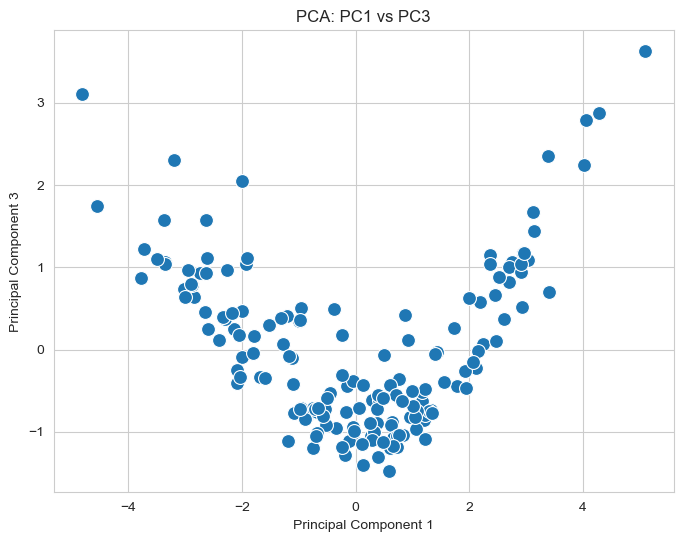

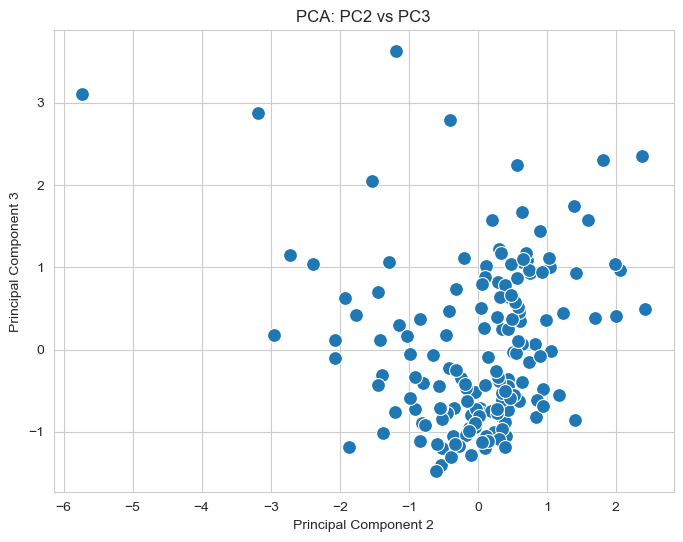


3D PCA - WCSS for each run: [293.5038375902489, 293.5498382519894, 304.7472213917649, 295.64963123750056, 308.7596658616588]
3D PCA - Best WCSS: 293.5038375902489


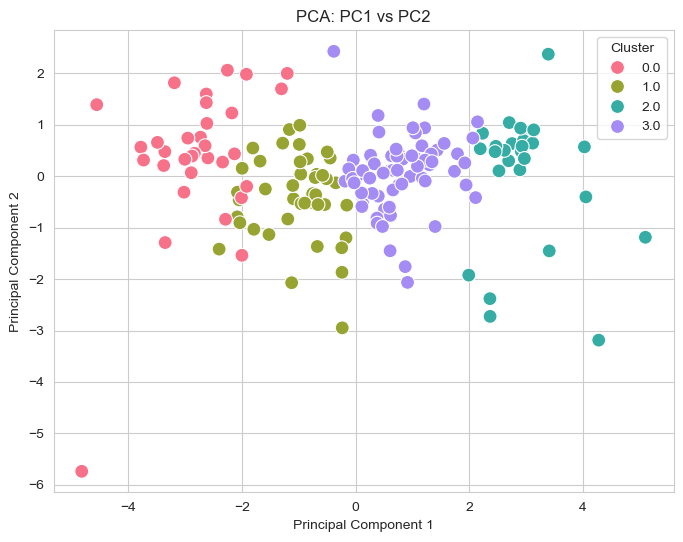

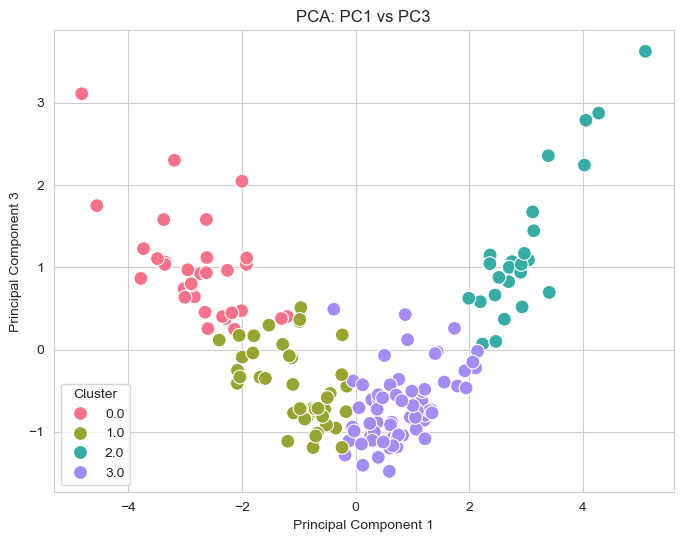

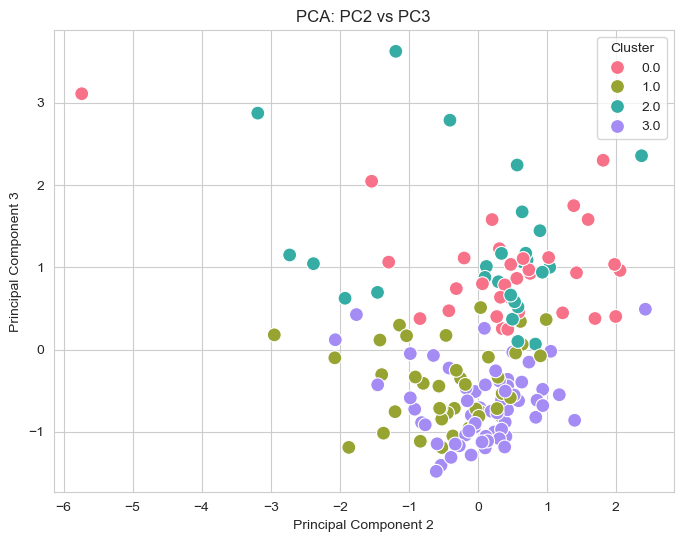

3D reduced data with cluster assignments saved to 'pca_3d_reduced_data.csv'

Clustering Comparison (Adjusted Rand Index):
Original vs 2D PCA: 0.6653
Original vs 3D PCA: 0.5113
2D PCA vs 3D PCA: 0.6335


In [9]:
#Question 2c
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score

def load_standardized_data(file_path):
    df = pd.read_csv(file_path)
    return df.values

def pca_from_scratch(data):
    cov_matrix = np.cov(data.T)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors, cov_matrix

def explained_variance_ratio(eigenvalues):
    total_variance = np.sum(eigenvalues)
    return eigenvalues / total_variance

def components_for_variance_ratio(explained_variance, threshold=0.8):
    cumulative_variance = np.cumsum(explained_variance)
    num_components = np.argmax(cumulative_variance >= threshold) + 1
    return num_components, cumulative_variance

def project_data(data, eigenvectors, num_components=2):
    top_eigenvectors = eigenvectors[:, :num_components]
    projected_data = np.dot(data, top_eigenvectors)
    return projected_data

def initialize_centroids(data, k, random_seed):
    np.random.seed(random_seed)
    indices = np.random.choice(len(data), k, replace=False)
    return data[indices]

def euclidean_distance(point, centroids):
    return np.sqrt(np.sum((point - centroids) ** 2, axis=1))

def assign_clusters(data, centroids):
    clusters = np.zeros(len(data))
    for i, point in enumerate(data):
        distances = euclidean_distance(point, centroids)
        clusters[i] = np.argmin(distances)
    return clusters

def update_centroids(data, clusters, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

def compute_wcss(data, clusters, centroids):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            wcss += np.sum((cluster_points - centroids[i]) ** 2)
    return wcss

def kmeans(data, k, random_seed, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(data, k, random_seed)
    for _ in range(max_iters):
        old_centroids = centroids.copy()
        clusters = assign_clusters(data, centroids)
        centroids = update_centroids(data, clusters, k)
        if np.max(np.sqrt(np.sum((centroids - old_centroids) ** 2, axis=1))) < tol:
            break
    wcss = compute_wcss(data, clusters, centroids)
    return clusters, centroids, wcss

def run_multiple_kmeans(data, k, n_runs):
    best_clusters = None
    best_centroids = None
    best_wcss = float('inf')
    wcss_list = []
    for i in range(n_runs):
        clusters, centroids, wcss = kmeans(data, k, random_seed=i)
        wcss_list.append(wcss)
        if wcss < best_wcss:
            best_wcss = wcss
            best_clusters = clusters
            best_centroids = centroids
    return best_clusters, best_centroids, wcss_list

def plot_pca_scatter(projected_data, clusters=None, filename_prefix='pca'):
    sns.set_style("whitegrid")
    if clusters is None:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=projected_data[:, 0], y=projected_data[:, 1], s=100)
        plt.title('PCA: First Two Principal Components')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.savefig(f'{filename_prefix}_scatter.png')
        plt.show()
    else:
        palette = sns.color_palette("husl", 4)
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=projected_data[:, 0], y=projected_data[:, 1], hue=clusters, palette=palette, s=100)
        plt.title('PCA: First Two Principal Components with K-means Clusters')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend(title='Cluster')
        plt.savefig(f'{filename_prefix}_clustered.png')
        plt.show()

def plot_pairwise_scatter_3d(projected_data, clusters=None, filename_prefix='pca_3d'):
    sns.set_style("whitegrid")
    palette = sns.color_palette("husl", 4) if clusters is not None else None
    
    # PC1 vs PC2
    plt.figure(figsize=(8, 6))
    if clusters is None:
        sns.scatterplot(x=projected_data[:, 0], y=projected_data[:, 1], s=100)
    else:
        sns.scatterplot(x=projected_data[:, 0], y=projected_data[:, 1], hue=clusters, palette=palette, s=100)
    plt.title('PCA: PC1 vs PC2')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster') if clusters is not None else None
    plt.savefig(f'{filename_prefix}_pc1_vs_pc2.png')
    plt.show()
    
    # PC1 vs PC3
    plt.figure(figsize=(8, 6))
    if clusters is None:
        sns.scatterplot(x=projected_data[:, 0], y=projected_data[:, 2], s=100)
    else:
        sns.scatterplot(x=projected_data[:, 0], y=projected_data[:, 2], hue=clusters, palette=palette, s=100)
    plt.title('PCA: PC1 vs PC3')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 3')
    plt.legend(title='Cluster') if clusters is not None else None
    plt.savefig(f'{filename_prefix}_pc1_vs_pc3.png')
    plt.show()
    
    # PC2 vs PC3
    plt.figure(figsize=(8, 6))
    if clusters is None:
        sns.scatterplot(x=projected_data[:, 1], y=projected_data[:, 2], s=100)
    else:
        sns.scatterplot(x=projected_data[:, 1], y=projected_data[:, 2], hue=clusters, palette=palette, s=100)
    plt.title('PCA: PC2 vs PC3')
    plt.xlabel('Principal Component 2')
    plt.ylabel('Principal Component 3')
    plt.legend(title='Cluster') if clusters is not None else None
    plt.savefig(f'{filename_prefix}_pc2_vs_pc3.png')
    plt.show()

def compare_clusterings(original_clusters, clusters_2d, clusters_3d):
    ari_original_vs_2d = adjusted_rand_score(original_clusters, clusters_2d)
    ari_original_vs_3d = adjusted_rand_score(original_clusters, clusters_3d)
    ari_2d_vs_3d = adjusted_rand_score(clusters_2d, clusters_3d)
    
    print("\nClustering Comparison (Adjusted Rand Index):")
    print(f"Original vs 2D PCA: {ari_original_vs_2d:.4f}")
    print(f"Original vs 3D PCA: {ari_original_vs_3d:.4f}")
    print(f"2D PCA vs 3D PCA: {ari_2d_vs_3d:.4f}")

def main():
    file_path = 'scaled_country_data.csv'
    original_clusters_file = 'cluster_assignments.csv'
    pca_2d_clusters_file = 'pca_reduced_data.csv'
    
    data = load_standardized_data(file_path)
    
    eigenvalues, eigenvectors, cov_matrix = pca_from_scratch(data)
    explained_variance = explained_variance_ratio(eigenvalues)
    num_components, cumulative_variance = components_for_variance_ratio(explained_variance, threshold=0.8)
    
    print("Covariance Matrix:\n", cov_matrix)
    print("\nEigenvalues (sorted):\n", eigenvalues)
    print("\nEigenvectors (sorted):\n", eigenvectors)
    print("\nExplained Variance Ratio:\n", explained_variance)
    print("\nCumulative Explained Variance:\n", cumulative_variance)
    print(f"\nNumber of components to explain at least 80% of variance: {num_components}")
    
    pca_results = pd.DataFrame({
        'Component': range(1, len(eigenvalues) + 1),
        'Eigenvalue': eigenvalues,
        'Explained Variance Ratio': explained_variance,
        'Cumulative Variance': cumulative_variance
    })
    pca_results.to_csv('pca_results.csv', index=False)
    print("\nPCA results saved to 'pca_results.csv'")
    
    # 2D PCA Analysis (from previous task)
    projected_data_2d = project_data(data, eigenvectors, num_components=2)
    plot_pca_scatter(projected_data_2d, filename_prefix='pca')
    
    k = 4
    n_runs = 5
    best_clusters_2d, best_centroids_2d, wcss_list_2d = run_multiple_kmeans(projected_data_2d, k, n_runs)
    print("\n2D PCA - WCSS for each run:", wcss_list_2d)
    print("2D PCA - Best WCSS:", min(wcss_list_2d))
    
    plot_pca_scatter(projected_data_2d, best_clusters_2d, filename_prefix='pca_clustered')
    
    reduced_data_2d_df = pd.DataFrame(projected_data_2d, columns=['PC1', 'PC2'])
    reduced_data_2d_df['Cluster'] = best_clusters_2d.astype(int)
    reduced_data_2d_df.to_csv('pca_reduced_data.csv', index=False)
    print("2D reduced data with cluster assignments saved to 'pca_reduced_data.csv'")
    
    # 3D PCA Analysis
    projected_data_3d = project_data(data, eigenvectors, num_components=3)
    plot_pairwise_scatter_3d(projected_data_3d, filename_prefix='pca_3d')
    
    best_clusters_3d, best_centroids_3d, wcss_list_3d = run_multiple_kmeans(projected_data_3d, k, n_runs)
    print("\n3D PCA - WCSS for each run:", wcss_list_3d)
    print("3D PCA - Best WCSS:", min(wcss_list_3d))
    
    plot_pairwise_scatter_3d(projected_data_3d, best_clusters_3d, filename_prefix='pca_3d_clustered')
    
    reduced_data_3d_df = pd.DataFrame(projected_data_3d, columns=['PC1', 'PC2', 'PC3'])
    reduced_data_3d_df['Cluster'] = best_clusters_3d.astype(int)
    reduced_data_3d_df.to_csv('pca_3d_reduced_data.csv', index=False)
    print("3D reduced data with cluster assignments saved to 'pca_3d_reduced_data.csv'")
    
    # Load previous clusterings for comparison
    original_clusters = pd.read_csv(original_clusters_file)['Cluster'].values
    clusters_2d = pd.read_csv(pca_2d_clusters_file)['Cluster'].values
    
    # Compare clusterings
    compare_clusterings(original_clusters, clusters_2d, best_clusters_3d)

if __name__ == '__main__':
    main()

Covariance Matrix:
 [[ 1.0060241  -0.2016093  -0.52747354  0.29001277 -0.89201752  0.85358942
  -0.485942  ]
 [-0.2016093   1.0060241   0.1303592  -0.2569142   0.21196135 -0.19785877
   0.34804965]
 [-0.52747354  0.1303592   1.0060241  -0.14864609  0.61564899 -0.50486319
   0.90096644]
 [ 0.29001277 -0.2569142  -0.14864609  1.0060241  -0.24114897  0.31883023
  -0.22296618]
 [-0.89201752  0.21196135  0.61564899 -0.24114897  1.0060241  -0.76545827
   0.60370413]
 [ 0.85358942 -0.19785877 -0.50486319  0.31883023 -0.76545827  1.0060241
  -0.45765069]
 [-0.485942    0.34804965  0.90096644 -0.22296618  0.60370413 -0.45765069
   1.0060241 ]]

Eigenvalues (sorted):
 [3.86286999 1.08494913 0.99866771 0.70733799 0.22953052 0.0901935
 0.06861985]

Eigenvectors (sorted):
 [[-0.44888664  0.08216402  0.37099265 -0.18617629 -0.18882546  0.684927
   0.33863351]
 [ 0.18170281  0.68608763  0.34930034  0.58684433 -0.03179496 -0.07662944
   0.15161748]
 [ 0.40494616 -0.27619695  0.44496665 -0.27244024 -0.

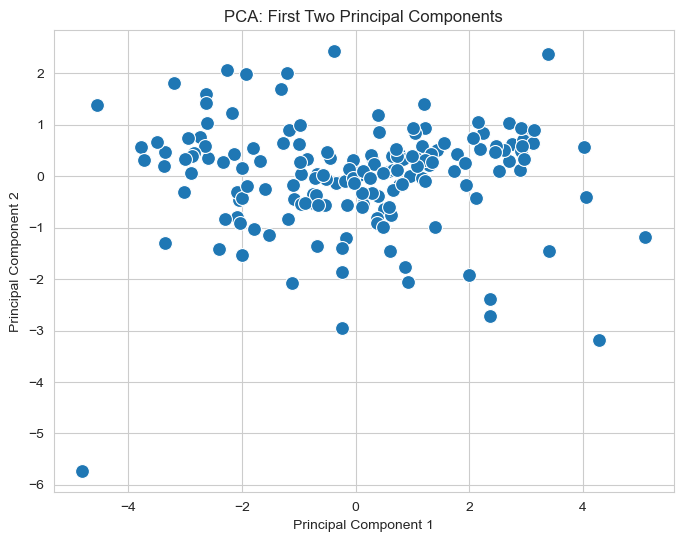


2D PCA - WCSS for each run: [231.44465293569817, 225.18542970346834, 236.06743578787285, 242.1371749244134, 224.22011327159262]
2D PCA - Best WCSS: 224.22011327159262


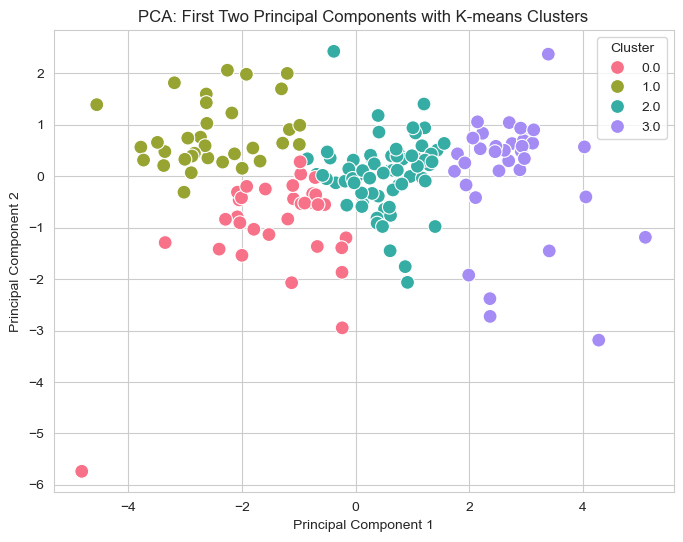

2D reduced data with cluster assignments saved to 'pca_reduced_data.csv'


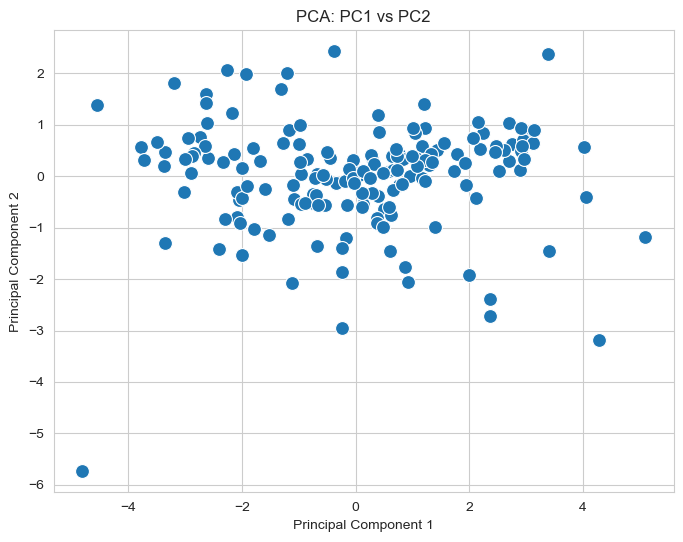

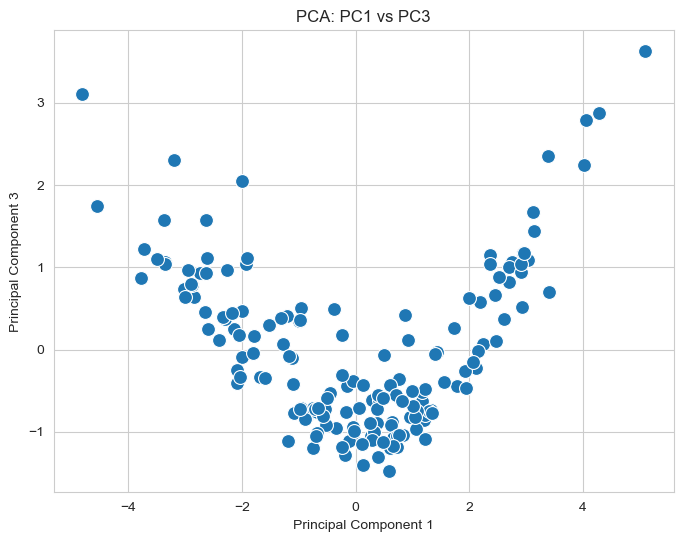

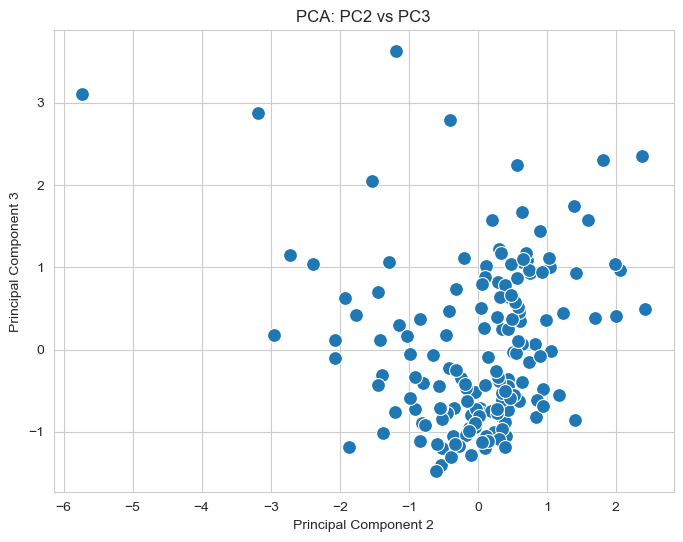


3D PCA - WCSS for each run: [293.5038375902489, 293.5498382519894, 304.7472213917649, 295.64963123750056, 308.7596658616588]
3D PCA - Best WCSS: 293.5038375902489


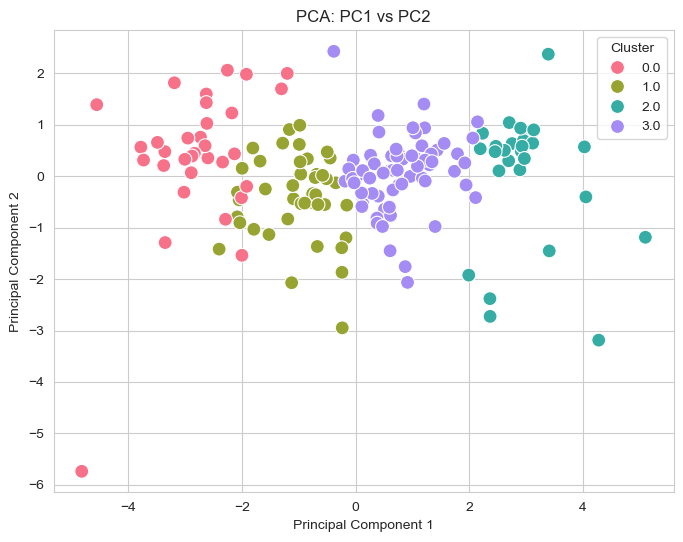

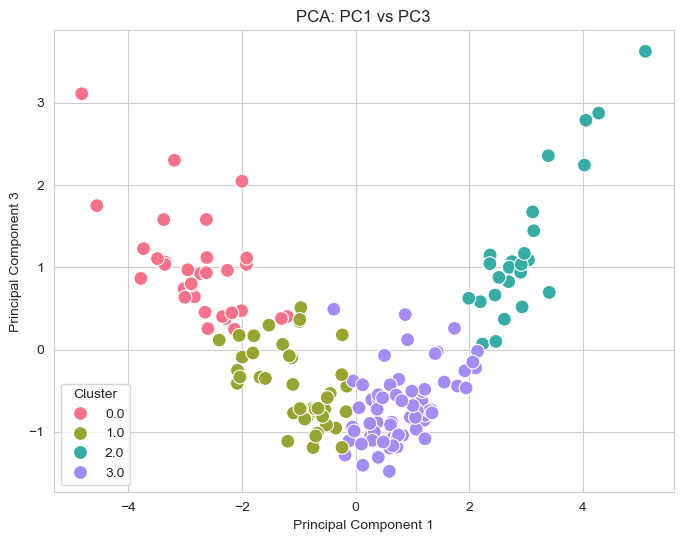

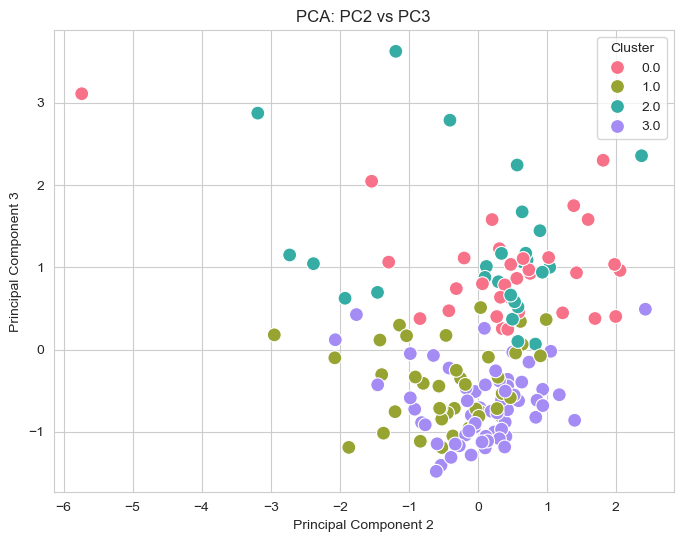

3D reduced data with cluster assignments saved to 'pca_3d_reduced_data.csv'

Clustering Comparison (Adjusted Rand Index):
Original vs 2D PCA: 0.6653
Original vs 3D PCA: 0.5113
2D PCA vs 3D PCA: 0.6335


In [10]:
#Question 2d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score

def load_standardized_data(file_path):
    """Load standardized dataset from a CSV file.

    Args:
        file_path (str): Path to the standardized CSV file.

    Returns:
        np.ndarray: Data as a NumPy array.

    Raises:
        FileNotFoundError: If the file does not exist.
        pd.errors.EmptyDataError: If the file is empty.
    """
    try:
        df = pd.read_csv(file_path)
        return df.values
    except FileNotFoundError:
        raise FileNotFoundError(f"Error: The file '{file_path}' was not found.")
    except pd.errors.EmptyDataError:
        raise pd.errors.EmptyDataError(f"Error: The file '{file_path}' is empty.")

def pca_from_scratch(data):
    """Perform PCA on the standardized dataset.

    Args:
        data (np.ndarray): Standardized data matrix (n_samples, n_features).

    Returns:
        tuple: (eigenvalues, eigenvectors, covariance matrix).

    Raises:
        ValueError: If data is empty or contains invalid values.
    """
    try:
        # Calculate the covariance matrix
        cov_matrix = np.cov(data.T)
        # Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        # Sort eigenvalues and eigenvectors in descending order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        return eigenvalues, eigenvectors, cov_matrix
    except np.linalg.LinAlgError as e:
        raise ValueError(f"Error in PCA computation: {str(e)}")
    except Exception as e:
        raise ValueError(f"Unexpected error in PCA: {str(e)}")

def explained_variance_ratio(eigenvalues):
    """Compute the explained variance ratio for each principal component.

    Args:
        eigenvalues (np.ndarray): Array of eigenvalues.

    Returns:
        np.ndarray: Explained variance ratios.
    """
    total_variance = np.sum(eigenvalues)
    return eigenvalues / total_variance

def components_for_variance_ratio(explained_variance, threshold=0.8):
    """Determine the number of components to explain a given variance threshold.

    Args:
        explained_variance (np.ndarray): Explained variance ratios.
        threshold (float): Variance threshold (default: 0.8).

    Returns:
        tuple: (number of components, cumulative variance).
    """
    cumulative_variance = np.cumsum(explained_variance)
    num_components = np.argmax(cumulative_variance >= threshold) + 1
    return num_components, cumulative_variance

def project_data(data, eigenvectors, num_components=2):
    """Project data onto the top principal components.

    Args:
        data (np.ndarray): Standardized data matrix.
        eigenvectors (np.ndarray): Eigenvectors from PCA.
        num_components (int): Number of components to project onto.

    Returns:
        np.ndarray: Projected data.
    """
    top_eigenvectors = eigenvectors[:, :num_components]
    projected_data = np.dot(data, top_eigenvectors)
    return projected_data

def initialize_centroids(data, k, random_seed):
    """Initialize centroids for K-means clustering.

    Args:
        data (np.ndarray): Data to cluster.
        k (int): Number of clusters.
        random_seed (int): Random seed for reproducibility.

    Returns:
        np.ndarray: Initial centroids.
    """
    np.random.seed(random_seed)
    indices = np.random.choice(len(data), k, replace=False)
    return data[indices]

def euclidean_distance(point, centroids):
    """Compute Euclidean distance between a point and centroids.

    Args:
        point (np.ndarray): Data point.
        centroids (np.ndarray): Centroids.

    Returns:
        np.ndarray: Distances to each centroid.
    """
    return np.sqrt(np.sum((point - centroids) ** 2, axis=1))

def assign_clusters(data, centroids):
    """Assign data points to the nearest centroid.

    Args:
        data (np.ndarray): Data to cluster.
        centroids (np.ndarray): Centroids.

    Returns:
        np.ndarray: Cluster assignments.
    """
    clusters = np.zeros(len(data))
    for i, point in enumerate(data):
        distances = euclidean_distance(point, centroids)
        clusters[i] = np.argmin(distances)
    return clusters

def update_centroids(data, clusters, k):
    """Update centroids based on current cluster assignments.

    Args:
        data (np.ndarray): Data to cluster.
        clusters (np.ndarray): Current cluster assignments.
        k (int): Number of clusters.

    Returns:
        np.ndarray: Updated centroids.
    """
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

def compute_wcss(data, clusters, centroids):
    """Compute Within-Cluster Sum of Squares (WCSS).

    Args:
        data (np.ndarray): Data to cluster.
        clusters (np.ndarray): Cluster assignments.
        centroids (np.ndarray): Centroids.

    Returns:
        float: WCSS value.
    """
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            wcss += np.sum((cluster_points - centroids[i]) ** 2)
    return wcss

def kmeans(data, k, random_seed, max_iters=100, tol=1e-4):
    """Run K-means clustering on the data.

    Args:
        data (np.ndarray): Data to cluster.
        k (int): Number of clusters.
        random_seed (int): Random seed for reproducibility.
        max_iters (int): Maximum iterations (default: 100).
        tol (float): Convergence tolerance (default: 1e-4).

    Returns:
        tuple: (clusters, centroids, WCSS).

    Raises:
        ValueError: If k is invalid or clustering fails.
    """
    try:
        if k <= 0 or k > len(data):
            raise ValueError(f"Invalid k value: {k}. Must be between 1 and number of samples.")
        centroids = initialize_centroids(data, k, random_seed)
        for _ in range(max_iters):
            old_centroids = centroids.copy()
            clusters = assign_clusters(data, centroids)
            centroids = update_centroids(data, clusters, k)
            if np.max(np.sqrt(np.sum((centroids - old_centroids) ** 2, axis=1))) < tol:
                break
        wcss = compute_wcss(data, clusters, centroids)
        return clusters, centroids, wcss
    except Exception as e:
        raise ValueError(f"Error in K-means clustering: {str(e)}")

def run_multiple_kmeans(data, k, n_runs):
    """Run K-means multiple times and select the best clustering.

    Args:
        data (np.ndarray): Data to cluster.
        k (int): Number of clusters.
        n_runs (int): Number of random initializations.

    Returns:
        tuple: (best clusters, best centroids, WCSS list).
    """
    best_clusters = None
    best_centroids = None
    best_wcss = float('inf')
    wcss_list = []
    for i in range(n_runs):
        clusters, centroids, wcss = kmeans(data, k, random_seed=i)
        wcss_list.append(wcss)
        if wcss < best_wcss:
            best_wcss = wcss
            best_clusters = clusters
            best_centroids = centroids
    return best_clusters, best_centroids, wcss_list

def plot_pca_scatter(projected_data, clusters=None, filename_prefix='pca'):
    """Plot a scatter plot of the first two principal components.

    Args:
        projected_data (np.ndarray): 2D projected data.
        clusters (np.ndarray, optional): Cluster assignments for color-coding.
        filename_prefix (str): Prefix for the output filename.
    """
    sns.set_style("whitegrid")
    if clusters is None:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=projected_data[:, 0], y=projected_data[:, 1], s=100)
        plt.title('PCA: First Two Principal Components')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.savefig(f'{filename_prefix}_scatter.png')
        plt.show()
    else:
        palette = sns.color_palette("husl", 4)
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=projected_data[:, 0], y=projected_data[:, 1], hue=clusters, palette=palette, s=100)
        plt.title('PCA: First Two Principal Components with K-means Clusters')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend(title='Cluster')
        plt.savefig(f'{filename_prefix}_clustered.png')
        plt.show()

def plot_pairwise_scatter_3d(projected_data, clusters=None, filename_prefix='pca_3d'):
    """Plot pairwise scatter plots of the first three principal components.

    Args:
        projected_data (np.ndarray): 3D projected data.
        clusters (np.ndarray, optional): Cluster assignments for color-coding.
        filename_prefix (str): Prefix for the output filename.
    """
    sns.set_style("whitegrid")
    palette = sns.color_palette("husl", 4) if clusters is not None else None
    
    # PC1 vs PC2
    plt.figure(figsize=(8, 6))
    if clusters is None:
        sns.scatterplot(x=projected_data[:, 0], y=projected_data[:, 1], s=100)
    else:
        sns.scatterplot(x=projected_data[:, 0], y=projected_data[:, 1], hue=clusters, palette=palette, s=100)
    plt.title('PCA: PC1 vs PC2')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster') if clusters is not None else None
    plt.savefig(f'{filename_prefix}_pc1_vs_pc2.png')
    plt.show()
    
    # PC1 vs PC3
    plt.figure(figsize=(8, 6))
    if clusters is None:
        sns.scatterplot(x=projected_data[:, 0], y=projected_data[:, 2], s=100)
    else:
        sns.scatterplot(x=projected_data[:, 0], y=projected_data[:, 2], hue=clusters, palette=palette, s=100)
    plt.title('PCA: PC1 vs PC3')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 3')
    plt.legend(title='Cluster') if clusters is not None else None
    plt.savefig(f'{filename_prefix}_pc1_vs_pc3.png')
    plt.show()
    
    # PC2 vs PC3
    plt.figure(figsize=(8, 6))
    if clusters is None:
        sns.scatterplot(x=projected_data[:, 1], y=projected_data[:, 2], s=100)
    else:
        sns.scatterplot(x=projected_data[:, 1], y=projected_data[:, 2], hue=clusters, palette=palette, s=100)
    plt.title('PCA: PC2 vs PC3')
    plt.xlabel('Principal Component 2')
    plt.ylabel('Principal Component 3')
    plt.legend(title='Cluster') if clusters is not None else None
    plt.savefig(f'{filename_prefix}_pc2_vs_pc3.png')
    plt.show()

def compare_clusterings(original_clusters, clusters_2d, clusters_3d):
    """Compare clustering results using Adjusted Rand Index (ARI).

    Args:
        original_clusters (np.ndarray): Clusters from original high-dimensional data.
        clusters_2d (np.ndarray): Clusters from 2D PCA data.
        clusters_3d (np.ndarray): Clusters from 3D PCA data.
    """
    ari_original_vs_2d = adjusted_rand_score(original_clusters, clusters_2d)
    ari_original_vs_3d = adjusted_rand_score(original_clusters, clusters_3d)
    ari_2d_vs_3d = adjusted_rand_score(clusters_2d, clusters_3d)
    
    print("\nClustering Comparison (Adjusted Rand Index):")
    print(f"Original vs 2D PCA: {ari_original_vs_2d:.4f}")
    print(f"Original vs 3D PCA: {ari_original_vs_3d:.4f}")
    print(f"2D PCA vs 3D PCA: {ari_2d_vs_3d:.4f}")

def main():
    """Main function to perform PCA, clustering, and visualization."""
    file_path = 'scaled_country_data.csv'
    original_clusters_file = 'cluster_assignments.csv'
    pca_2d_clusters_file = 'pca_reduced_data.csv'
    
    try:
        # Load standardized data
        data = load_standardized_data(file_path)
    except Exception as e:
        print(f"Failed to load data: {str(e)}")
        return
    
    # Perform PCA
    try:
        eigenvalues, eigenvectors, cov_matrix = pca_from_scratch(data)
    except Exception as e:
        print(f"PCA computation failed: {str(e)}")
        return
    
    # Compute explained variance and components for 80% variance
    explained_variance = explained_variance_ratio(eigenvalues)
    num_components, cumulative_variance = components_for_variance_ratio(explained_variance, threshold=0.8)
    
    print("Covariance Matrix:\n", cov_matrix)
    print("\nEigenvalues (sorted):\n", eigenvalues)
    print("\nEigenvectors (sorted):\n", eigenvectors)
    print("\nExplained Variance Ratio:\n", explained_variance)
    print("\nCumulative Explained Variance:\n", cumulative_variance)
    print(f"\nNumber of components to explain at least 80% of variance: {num_components}")
    
    # Save PCA results
    pca_results = pd.DataFrame({
        'Component': range(1, len(eigenvalues) + 1),
        'Eigenvalue': eigenvalues,
        'Explained Variance Ratio': explained_variance,
        'Cumulative Variance': cumulative_variance
    })
    pca_results.to_csv('pca_results.csv', index=False)
    print("\nPCA results saved to 'pca_results.csv'")
    
    # 2D PCA Analysis
    projected_data_2d = project_data(data, eigenvectors, num_components=2)
    plot_pca_scatter(projected_data_2d, filename_prefix='pca')
    
    k = 4
    n_runs = 5
    try:
        best_clusters_2d, best_centroids_2d, wcss_list_2d = run_multiple_kmeans(projected_data_2d, k, n_runs)
    except Exception as e:
        print(f"2D K-means clustering failed: {str(e)}")
        return
    
    print("\n2D PCA - WCSS for each run:", wcss_list_2d)
    print("2D PCA - Best WCSS:", min(wcss_list_2d))
    
    plot_pca_scatter(projected_data_2d, best_clusters_2d, filename_prefix='pca_clustered')
    
    reduced_data_2d_df = pd.DataFrame(projected_data_2d, columns=['PC1', 'PC2'])
    reduced_data_2d_df['Cluster'] = best_clusters_2d.astype(int)
    reduced_data_2d_df.to_csv('pca_reduced_data.csv', index=False)
    print("2D reduced data with cluster assignments saved to 'pca_reduced_data.csv'")
    
    # 3D PCA Analysis
    projected_data_3d = project_data(data, eigenvectors, num_components=3)
    plot_pairwise_scatter_3d(projected_data_3d, filename_prefix='pca_3d')
    
    try:
        best_clusters_3d, best_centroids_3d, wcss_list_3d = run_multiple_kmeans(projected_data_3d, k, n_runs)
    except Exception as e:
        print(f"3D K-means clustering failed: {str(e)}")
        return
    
    print("\n3D PCA - WCSS for each run:", wcss_list_3d)
    print("3D PCA - Best WCSS:", min(wcss_list_3d))
    
    plot_pairwise_scatter_3d(projected_data_3d, best_clusters_3d, filename_prefix='pca_3d_clustered')
    
    reduced_data_3d_df = pd.DataFrame(projected_data_3d, columns=['PC1', 'PC2', 'PC3'])
    reduced_data_3d_df['Cluster'] = best_clusters_3d.astype(int)
    reduced_data_3d_df.to_csv('pca_3d_reduced_data.csv', index=False)
    print("3D reduced data with cluster assignments saved to 'pca_3d_reduced_data.csv'")
    
    # Load previous clusterings for comparison
    try:
        original_clusters = pd.read_csv(original_clusters_file)['Cluster'].values
        clusters_2d = pd.read_csv(pca_2d_clusters_file)['Cluster'].values
    except Exception as e:
        print(f"Failed to load previous clusterings: {str(e)}")
        return
    
    # Compare clusterings
    compare_clusterings(original_clusters, clusters_2d, best_clusters_3d)

if __name__ == '__main__':
    main()

Converged after 27 iterations.

Final Estimates:
Gaussian 1:
  Mean (μ): 1.0812
  Variance (σ²): 0.8082
  Mixing Coefficient (π): 0.5540
Gaussian 2:
  Mean (μ): 4.6536
  Variance (σ²): 0.8221
  Mixing Coefficient (π): 0.4460


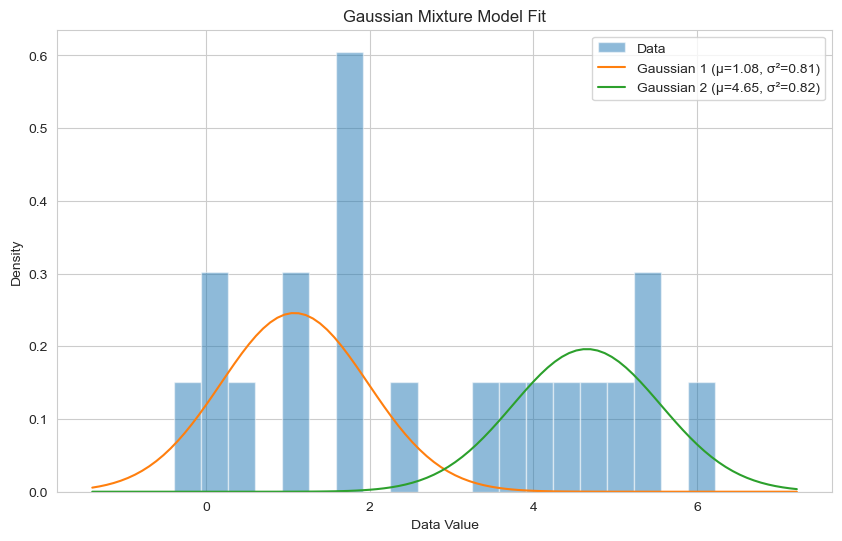


Responsibilities saved to 'responsibilities.csv'


In [11]:
#Question 3
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def initialize_parameters(data, k=2):
    """Initialize parameters for the Gaussian mixture model.

    Args:
        data (np.ndarray): 1D array of data points.
        k (int): Number of Gaussians (default: 2).

    Returns:
        tuple: (means, variances, mixing coefficients).
    """
    n = len(data)
    # Sort data and split into k groups to initialize means
    sorted_data = np.sort(data)
    means = np.array([sorted_data[i * (n // k)] for i in range(k)])
    # Initialize variances to 1 and mixing coefficients to 1/k
    variances = np.ones(k)
    mixing_coeffs = np.ones(k) / k
    return means, variances, mixing_coeffs

def gaussian_pdf(x, mean, variance):
    """Compute the Gaussian probability density function (PDF).

    Args:
        x (float): Data point.
        mean (float): Mean of the Gaussian.
        variance (float): Variance of the Gaussian.

    Returns:
        float: PDF value.
    """
    return norm.pdf(x, loc=mean, scale=np.sqrt(variance))

def e_step(data, means, variances, mixing_coeffs, k):
    """Expectation step: Compute responsibilities for each data point.

    Args:
        data (np.ndarray): 1D array of data points.
        means (np.ndarray): Means of the Gaussians.
        variances (np.ndarray): Variances of the Gaussians.
        mixing_coeffs (np.ndarray): Mixing coefficients.
        k (int): Number of Gaussians.

    Returns:
        np.ndarray: Responsibilities (n_samples, k).
    """
    n = len(data)
    responsibilities = np.zeros((n, k))
    for i in range(n):
        for j in range(k):
            responsibilities[i, j] = mixing_coeffs[j] * gaussian_pdf(data[i], means[j], variances[j])
        # Normalize responsibilities
        responsibilities[i] /= np.sum(responsibilities[i])
    return responsibilities

def m_step(data, responsibilities, k):
    """Maximization step: Update means, variances, and mixing coefficients.

    Args:
        data (np.ndarray): 1D array of data points.
        responsibilities (np.ndarray): Responsibilities (n_samples, k).
        k (int): Number of Gaussians.

    Returns:
        tuple: Updated (means, variances, mixing coefficients).
    """
    n = len(data)
    # Update means
    means = np.zeros(k)
    for j in range(k):
        means[j] = np.sum(responsibilities[:, j] * data) / np.sum(responsibilities[:, j])
    
    # Update variances
    variances = np.zeros(k)
    for j in range(k):
        variances[j] = np.sum(responsibilities[:, j] * (data - means[j])**2) / np.sum(responsibilities[:, j])
    
    # Update mixing coefficients
    mixing_coeffs = np.sum(responsibilities, axis=0) / n
    
    return means, variances, mixing_coeffs

def compute_log_likelihood(data, means, variances, mixing_coeffs, k):
    """Compute the log-likelihood of the data under the current model.

    Args:
        data (np.ndarray): 1D array of data points.
        means (np.ndarray): Means of the Gaussians.
        variances (np.ndarray): Variances of the Gaussians.
        mixing_coeffs (np.ndarray): Mixing coefficients.
        k (int): Number of Gaussians.

    Returns:
        float: Log-likelihood.
    """
    n = len(data)
    likelihood = np.zeros(n)
    for i in range(n):
        for j in range(k):
            likelihood[i] += mixing_coeffs[j] * gaussian_pdf(data[i], means[j], variances[j])
    return np.sum(np.log(likelihood))

def em_algorithm(data, k=2, max_iters=100, tol=1e-4):
    """Run the Expectation-Maximization algorithm for a Gaussian mixture model.

    Args:
        data (np.ndarray): 1D array of data points.
        k (int): Number of Gaussians (default: 2).
        max_iters (int): Maximum iterations (default: 100).
        tol (float): Convergence tolerance (default: 1e-4).

    Returns:
        tuple: Final (means, variances, mixing coefficients, responsibilities).

    Raises:
        ValueError: If input data or parameters are invalid.
    """
    try:
        if len(data) == 0:
            raise ValueError("Error: Input data is empty.")
        if k <= 0:
            raise ValueError(f"Error: Invalid number of Gaussians: {k}.")

        # Initialize parameters
        means, variances, mixing_coeffs = initialize_parameters(data, k)
        log_likelihood = float('-inf')

        # Iterate until convergence
        for iteration in range(max_iters):
            # E-step
            responsibilities = e_step(data, means, variances, mixing_coeffs, k)
            
            # M-step
            means, variances, mixing_coeffs = m_step(data, responsibilities, k)
            
            # Compute log-likelihood
            new_log_likelihood = compute_log_likelihood(data, means, variances, mixing_coeffs, k)
            
            # Check for convergence
            if abs(new_log_likelihood - log_likelihood) < tol:
                print(f"Converged after {iteration + 1} iterations.")
                break
            log_likelihood = new_log_likelihood

        return means, variances, mixing_coeffs, responsibilities
    except Exception as e:
        raise ValueError(f"Error in EM algorithm: {str(e)}")

def plot_gaussian_mixture(data, means, variances, mixing_coeffs, k):
    """Visualize the data and the fitted Gaussian mixture model.

    Args:
        data (np.ndarray): 1D array of data points.
        means (np.ndarray): Means of the Gaussians.
        variances (np.ndarray): Variances of the Gaussians.
        mixing_coeffs (np.ndarray): Mixing coefficients.
        k (int): Number of Gaussians.
    """
    plt.figure(figsize=(10, 6))
    # Plot histogram of the data
    plt.hist(data, bins=20, density=True, alpha=0.5, label='Data')
    
    # Plot the fitted Gaussians
    x = np.linspace(min(data) - 1, max(data) + 1, 100)
    for j in range(k):
        pdf = mixing_coeffs[j] * norm.pdf(x, loc=means[j], scale=np.sqrt(variances[j]))
        plt.plot(x, pdf, label=f'Gaussian {j+1} (μ={means[j]:.2f}, σ²={variances[j]:.2f})')
    
    plt.title('Gaussian Mixture Model Fit')
    plt.xlabel('Data Value')
    plt.ylabel('Density')
    plt.legend()
    plt.savefig('gaussian_mixture_fit.png')
    plt.show()

def main():
    """Main function to run the EM algorithm and visualize results."""
    # Input data
    data = np.array([-0.39, 0.12, 0.94, 1.67, 1.76, 2.44, 3.72, 4.28, 4.92, 5.53,
                     0.06, 0.48, 1.01, 1.68, 1.80, 3.25, 4.12, 4.60, 5.28, 6.22])
    
    try:
        # Run EM algorithm
        k = 2  # Number of Gaussians
        means, variances, mixing_coeffs, responsibilities = em_algorithm(data, k)
        
        # Print results
        print("\nFinal Estimates:")
        for j in range(k):
            print(f"Gaussian {j+1}:")
            print(f"  Mean (μ): {means[j]:.4f}")
            print(f"  Variance (σ²): {variances[j]:.4f}")
            print(f"  Mixing Coefficient (π): {mixing_coeffs[j]:.4f}")
        
        # Visualize the results
        plot_gaussian_mixture(data, means, variances, mixing_coeffs, k)
        
        # Save responsibilities
        responsibilities_df = pd.DataFrame(responsibilities, columns=[f'Gaussian_{j+1}' for j in range(k)])
        responsibilities_df.to_csv('responsibilities.csv', index=False)
        print("\nResponsibilities saved to 'responsibilities.csv'")
        
    except Exception as e:
        print(f"Error in main: {str(e)}")

if __name__ == '__main__':
    main()